Notebook to analysze MCMC outputs

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import invgamma
import datetime
import scipy
import importlib
import os, sys
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
import Gibbs
import seaborn as sns
import tqdm
import pymc3 as pm3
from collections import defaultdict
import arviz

Load mcmc data

In [2]:
# Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE/loose_5_10000.pkl")
#Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE_test_variance_30000_netter_start.pkl")
# Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE_test_variance_50000_wishart.pkl")
# Gibbs_out_raw = pd.read_pickle("../data/Gibbs_pair/Industrials/GWW_ALLE/loose_1_50000.pkl")
#Gibbs_out_raw = pd.read_pickle(f'../data/Gibbs_pair/Industrials_Healthcare_test_variance_60000_wishart.pkl')
# Gibbs_out_raw = pd.read_pickle(f'../data/Gibbs_pair/sectors/Industrials_Healthcare/loose_test.pkl')
# Gibbs_out_raw = pd.read_pickle(f'../data/Gibbs_pair/sectors/Healthcare_Utilities/run_job.pkl')
Gibbs_out_raw = pd.read_pickle(f'../data/Gibbs_pair/sectors/Healthcare_Industrials/run_job.pkl')

Run the code below if Gibbs_out_raw is not in a chain form (A chain form is a dictionary where index is chain number 1 and its items is another dicationary with the samples)

In [220]:
#chains = dict()
#chains[0] = Gibbs_out_raw

else set chains as Gibbs_out_raw

In [3]:
chains = Gibbs_out_raw


The gibbs sampler does not return the data in a optimal way

In [18]:
len(chains)

1

In [6]:
burnin = 0

step = 1
# combine chains with thinning
v1 = np.hstack([ chains[i]['v'][burnin::step,0] for i in range(len(chains))])
v2 = np.hstack([ chains[i]['v'][burnin::step,1] for i in range(len(chains))])
w11 =np.hstack([ chains[i]['w11'][burnin::step] for i in range(len(chains))])
w22 =np.hstack([ chains[i]['w22'][burnin::step] for i in range(len(chains))])
w12 =np.hstack([ chains[i]['w12'][burnin::step] for i in range(len(chains))])
G11 = np.hstack([ chains[i]['G11'][burnin::step] for i in range(len(chains))])
G22 = np.hstack([ chains[i]['G22'][burnin::step] for i in range(len(chains))])
states = np.concatenate([ chains[i]['states'][burnin::step,:] for i in range(len(chains))], axis = 0)


chains_for_gelman = defaultdict(dict)

for i in range(len(chains)):
    chains_for_gelman[i]['v1'] = chains[i]['v'][burnin::step,0]
    chains_for_gelman[i]['v2'] = chains[i]['v'][burnin::step,1]
    chains_for_gelman[i]['w11'] = chains[i]['w11'][burnin::step]
    chains_for_gelman[i]['w22'] = chains[i]['w22'][burnin::step]
    chains_for_gelman[i]['w12'] = chains[i]['w12'][burnin::step]
    chains_for_gelman[i]['G11'] = chains[i]['G11'][burnin::step]
    chains_for_gelman[i]['G22'] = chains[i]['G22'][burnin::step]



geweke_dict = dict()
geweke_dict['v1'] = v1
geweke_dict['v2'] = v2
geweke_dict['w11'] = w11
geweke_dict['w22'] = w22
geweke_dict['w12'] = w12
geweke_dict['G22'] = G11
geweke_dict['G11'] = G22



# plot assumes a certain strucutre of a dictionary
Gibbs_out_all = dict()
v = np.zeros((v1.shape[0],2))
v[:,0] =v1
v[:,1] =v2
Gibbs_out_all['v'] = v
w = np.zeros((w11.shape[0],2,2))
w[:,0,0] =w11
w[:,1,1] =w22
w[:,0,1]=w12
w[:,1,0]=w12
Gibbs_out_all['w'] = w
G = np.zeros((v1.shape[0],2,2))
G[:,0,0] = G11
G[:,1,1] = G22
Gibbs_out_all['G'] = G
Gibbs_out_all['states'] = states




In [197]:
Gibbs_out_all['v'].shape

(2950, 2)

# Plot trace

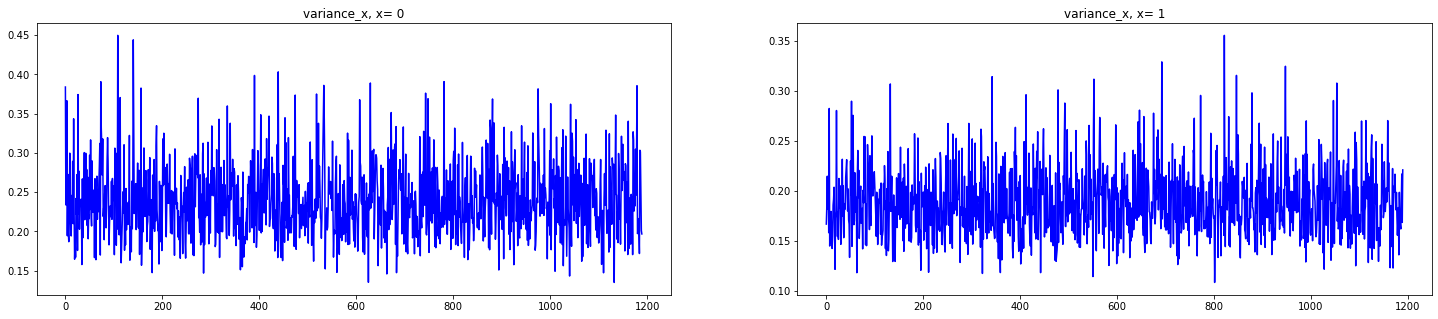

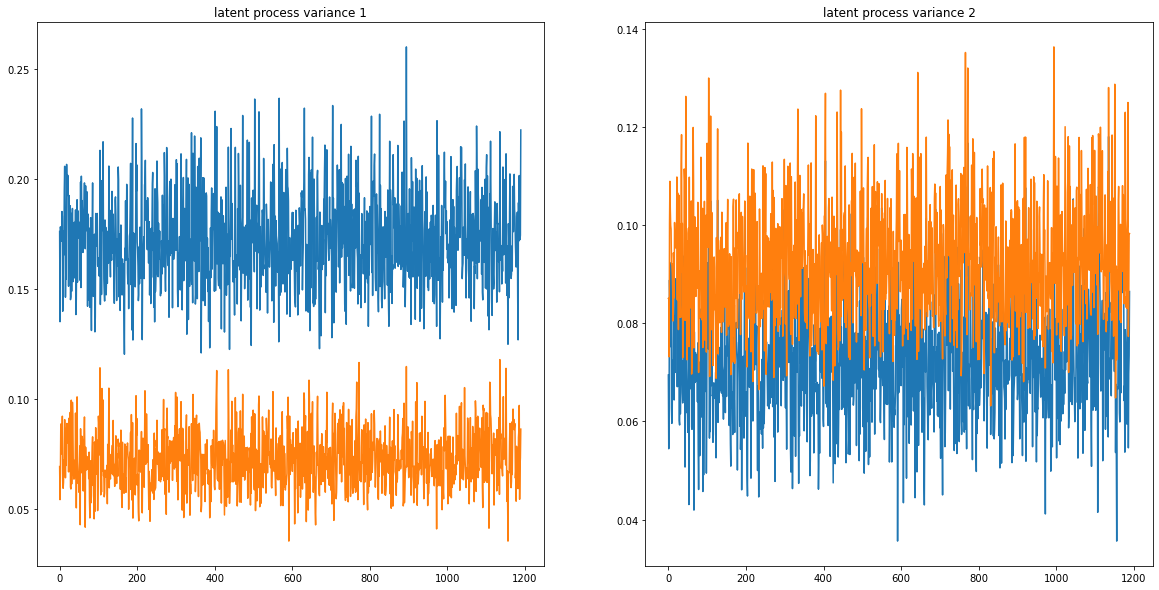

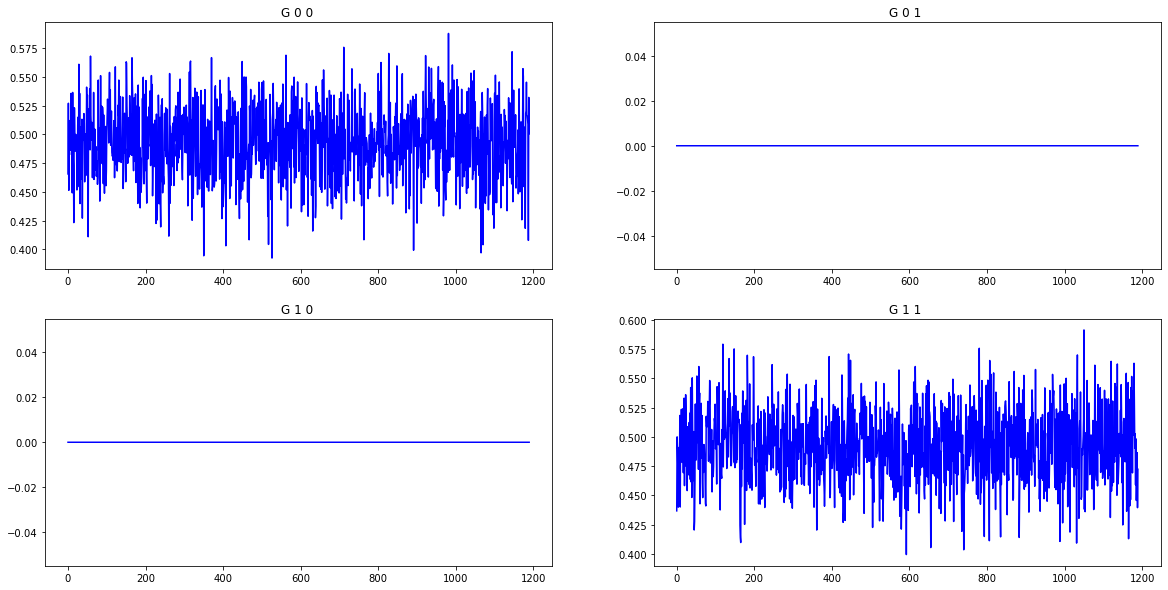

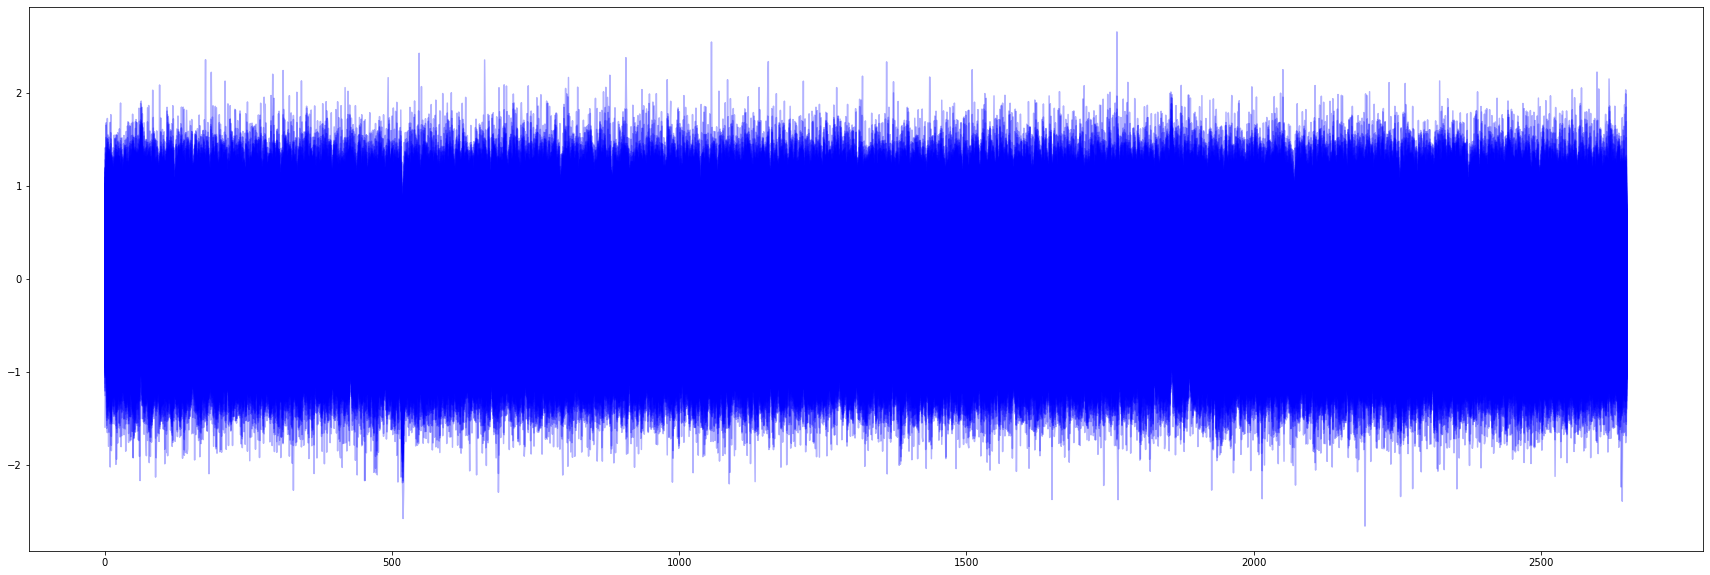

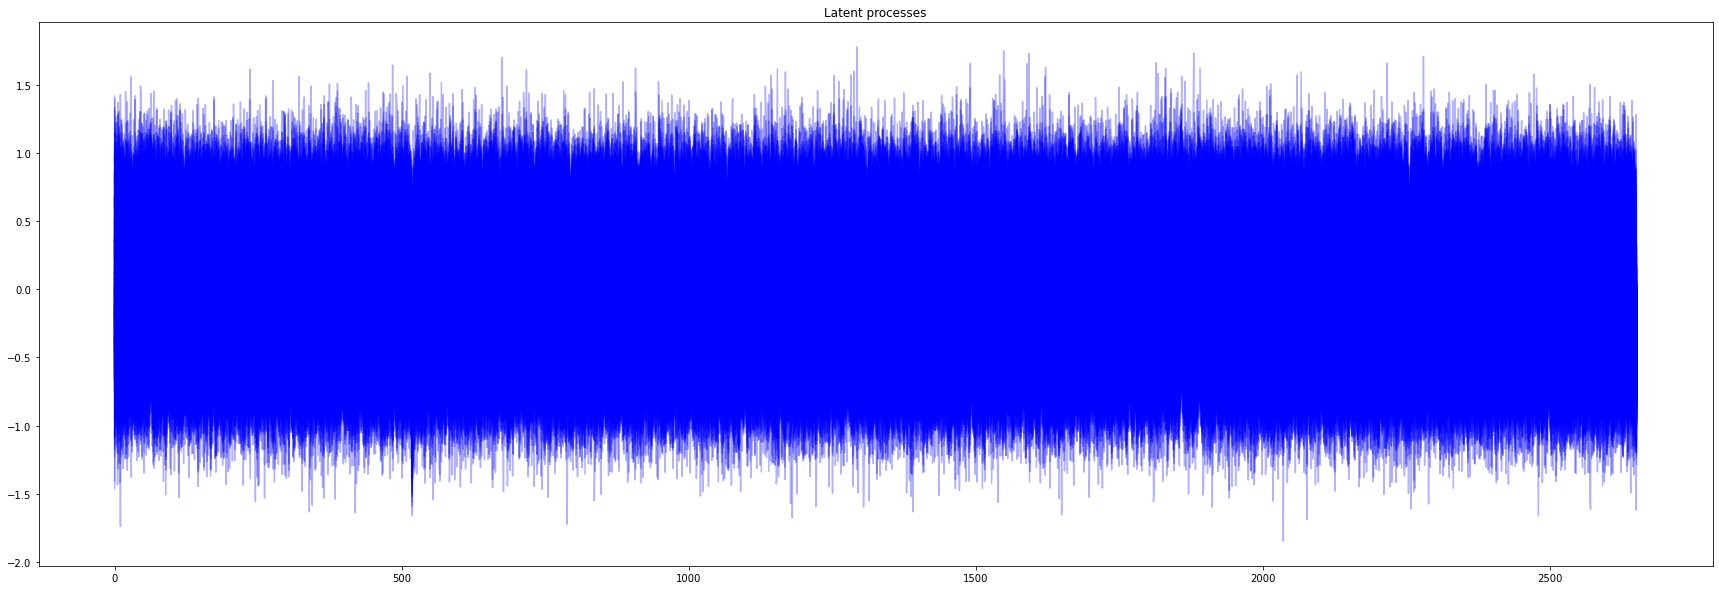

In [9]:
Gibbs.plot_gibbs_clean(Gibbs_out_all, state_from= 10)

# Effective sample size

v1:  0.931725944014191
v2:  0.98844721240726
w11:  0.9123707866259664
w22:  0.8365251029326572
w12:  0.7834105227486646
G11:  1.0528477225633346
G22:  0.9525146982697751


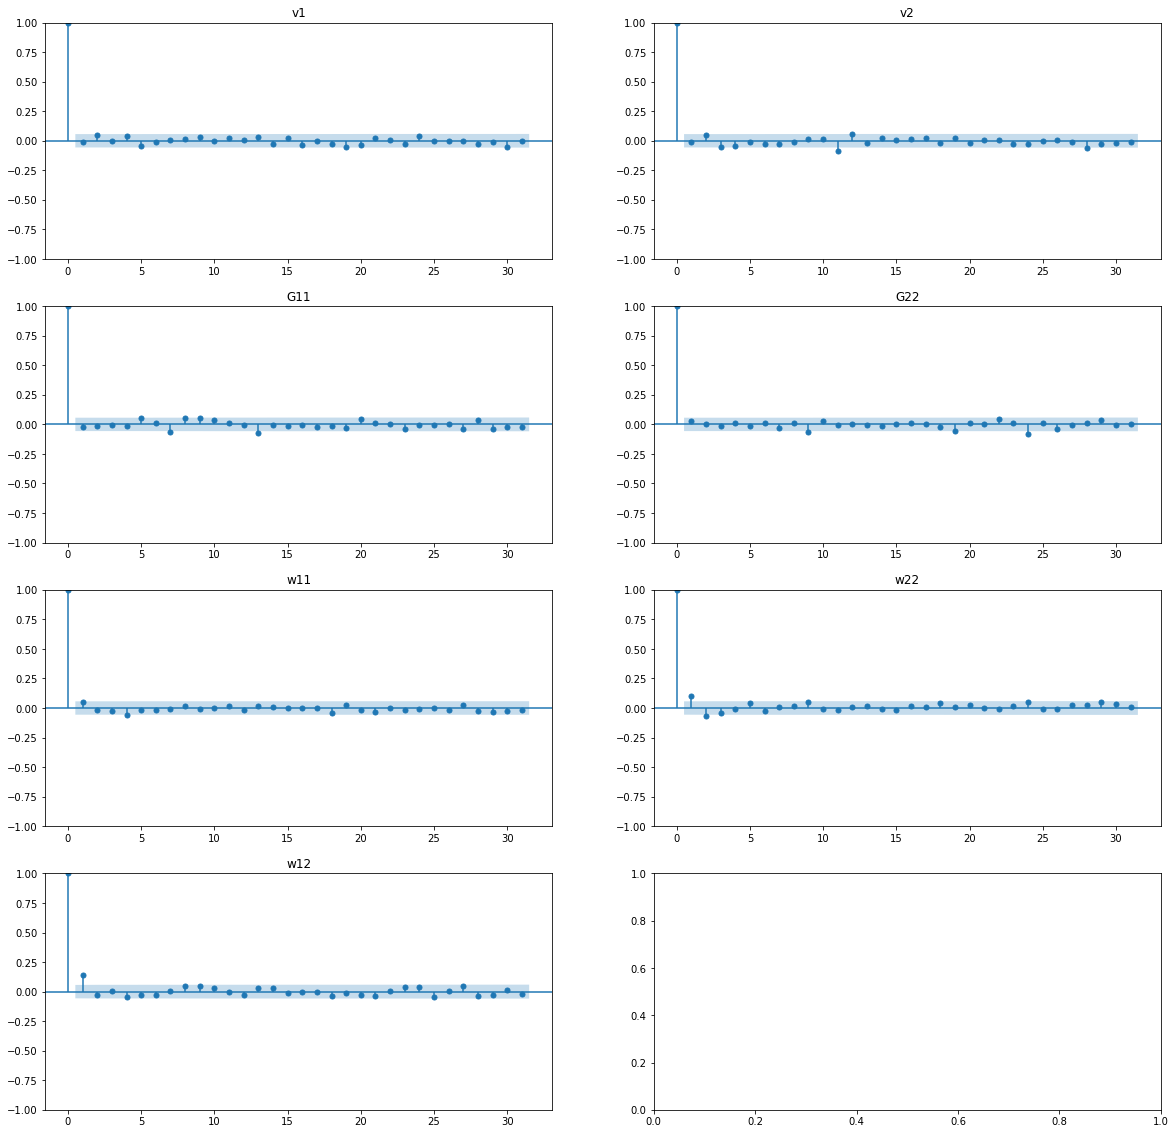

In [13]:
importlib.reload(sys.modules['Gibbs'])

N = len(v1)
# Effective sample size
print(f"v1:  {arviz.ess(v1)/N}")
print(f"v2:  {arviz.ess(v2)/N}")
print(f"w11:  {arviz.ess(w11)/N}")
print(f"w22:  {arviz.ess(w22)/N}")
print(f"w12:  {arviz.ess(w12)/N}")
print(f"G11:  {arviz.ess(G11)/N}")
print(f"G22:  {arviz.ess(G22)/N}")

Gibbs.plot_acf(v1,v2,G11,G22,w11,w22,w12)

# Geweke

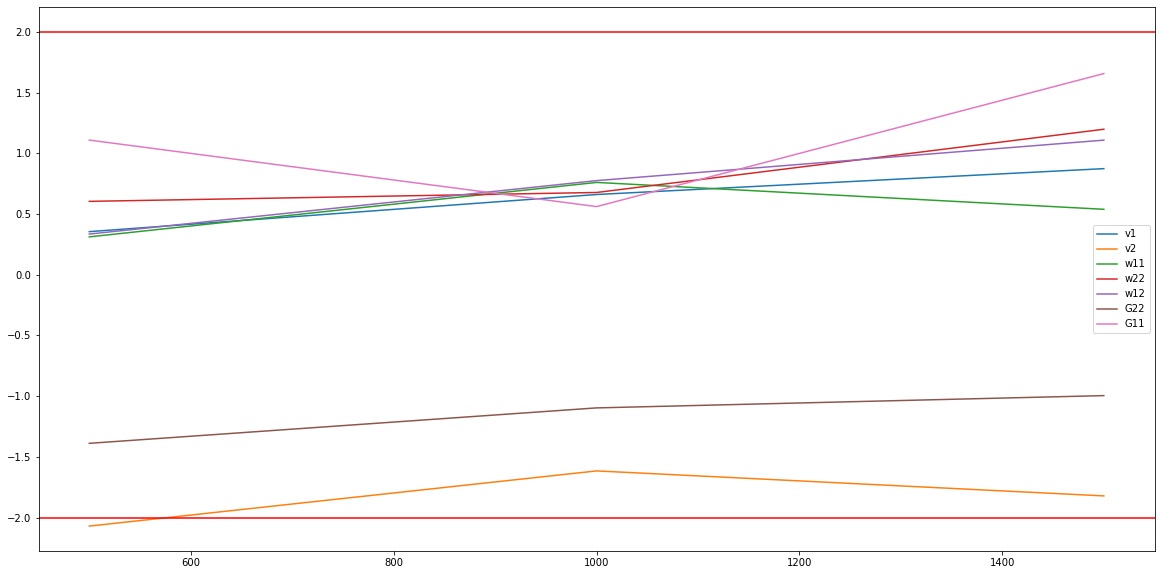

In [22]:
importlib.reload(sys.modules['Gibbs'])
start = 500
to = len(geweke_dict['v1']) + start
Gibbs.plot_geweke(geweke_dict, start = start, to = to, by = 500)

# Gelman-Rubin

In [202]:
importlib.reload(sys.modules['Gibbs'])
Gibbs.Gelman_rubin(chains_for_gelman, len(chains))


R for v1 is 0.9997072257594856
R for v2 is 1.0000291987706653
R for w11 is 1.003633795555576
R for w22 is 1.0019009203636198
R for w12 is 1.0024335669922906
R for G11 is 1.0017872548946287
R for G22 is 1.000444522633868


In [183]:
chains[0].keys()

dict_keys(['w11', 'w22', 'w12', 'v', 'G11', 'G22', 'states', 'init_params'])

In [203]:
for i in ['w11', 'w22', 'w12', 'G11', 'G22']:
    tmp = np.zeros((5,len(chains[0][i])))
    tmp[0] =chains[0][i]
    tmp[1] =chains[1][i]
    tmp[2] =chains[2][i]
    tmp[3] =chains[3][i]
    tmp[4] =chains[4][i]
    print(f'{i}: {arviz.rhat(tmp)}')


w11_arr = np.zeros((5,chains[0]['v'].shape[0]))
w11_arr[0] =chains[0]['v'][:,0]
w11_arr[1] =chains[1]['v'][:,0]
w11_arr[2] =chains[2]['v'][:,0]
w11_arr[3] =chains[3]['v'][:,0]
w11_arr[4] =chains[4]['v'][:,0]
print(f'v1: {arviz.rhat(w11_arr)}')


w11_arr = np.zeros((5,chains[0]['v'].shape[0]))
w11_arr[0] =chains[0]['v'][:,1]
w11_arr[1] =chains[1]['v'][:,1]
w11_arr[2] =chains[2]['v'][:,1]
w11_arr[3] =chains[3]['v'][:,1]
w11_arr[4] =chains[4]['v'][:,1]
print(f'v1: {arviz.rhat(w11_arr)}')

w11: 1.0030474319075837
w22: 1.000937312093096
w12: 1.0016038397646179
G11: 1.0006304968966362
G22: 1.0015280622382496
v1: 0.9997305386920375
v1: 1.0001380459034455


In [187]:
arviz.rhat(w11_arr)

1.0023828433731028

# Correlation Plot

In [15]:
esg_pivot_shifted_refined_diff

{'data':             Healthcare  Industrials  Consumer Cyclical  Technology  \
 date                                                                 
 2014-11-01    0.729717     0.271489           0.015849    0.623642   
 2014-11-02    0.000000     0.000000           0.000000    0.000000   
 2014-11-03    0.000000     0.000000           0.000000    0.000000   
 2014-11-04    0.000000     0.000000           0.000000    0.000000   
 2014-11-05    0.000000     0.000000           0.000000    0.000000   
 ...                ...          ...                ...         ...   
 2022-01-28    0.000000     0.000000           0.000000    0.000000   
 2022-01-29    0.000000     0.000000           0.000000    0.000000   
 2022-01-30    0.000000     0.000000           0.000000    0.000000   
 2022-01-31    0.000000     0.000000           0.000000    0.000000   
 2022-02-01   -0.308785    -0.234130          -0.562798   -0.325786   
 
             Consumer Defensive  Utilities  Financial Services  \
 

Text(0.5, 1.0, 'Observations')

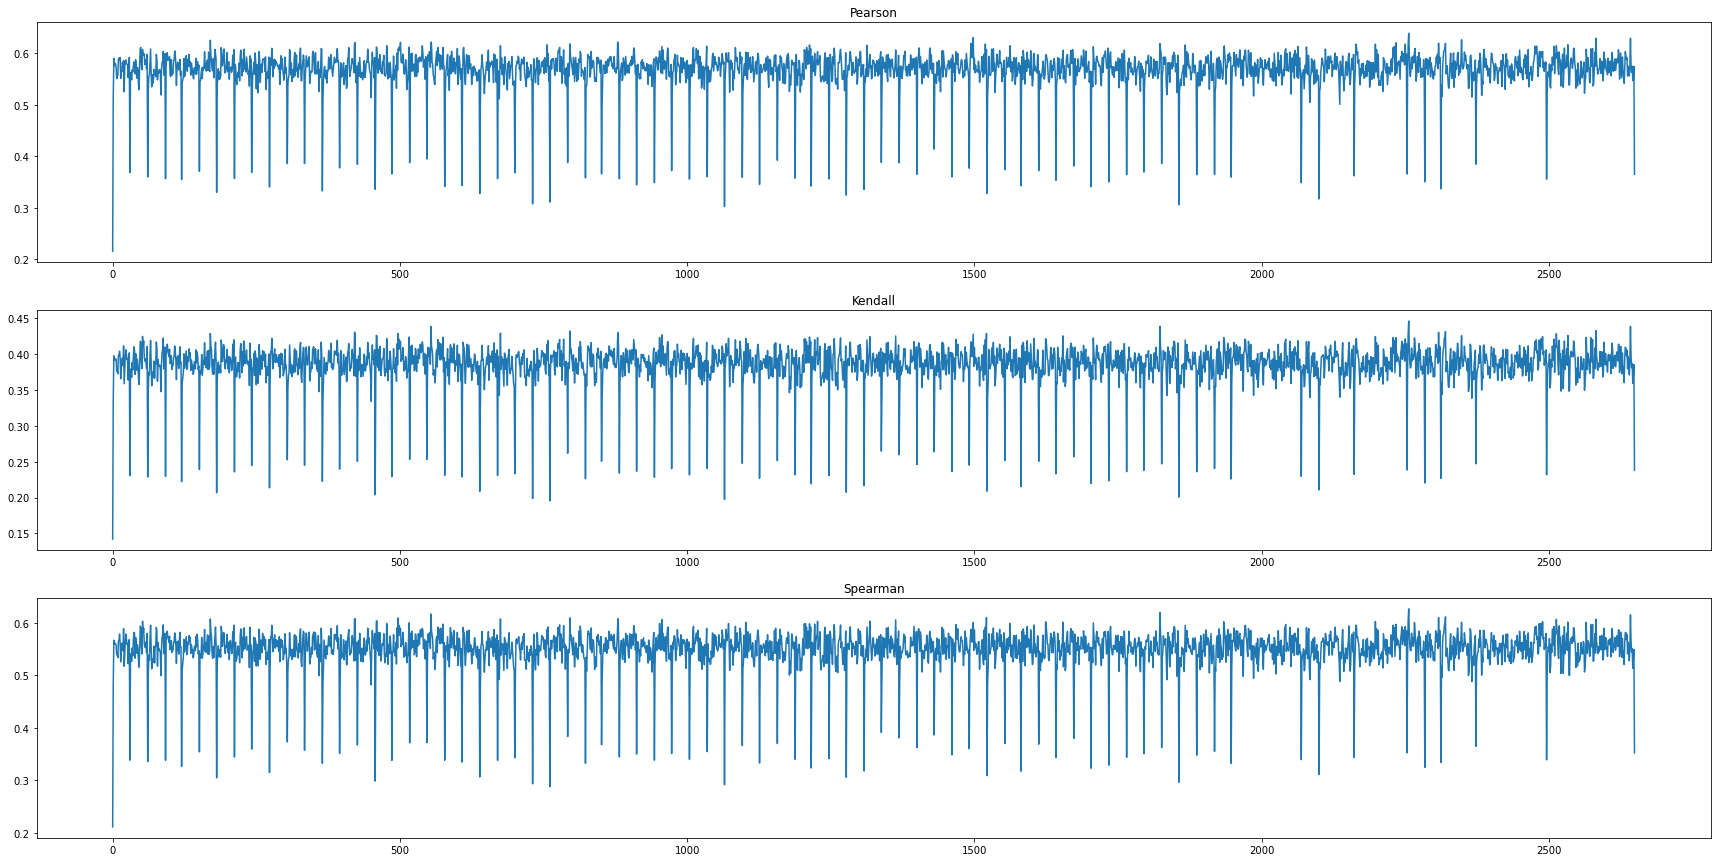

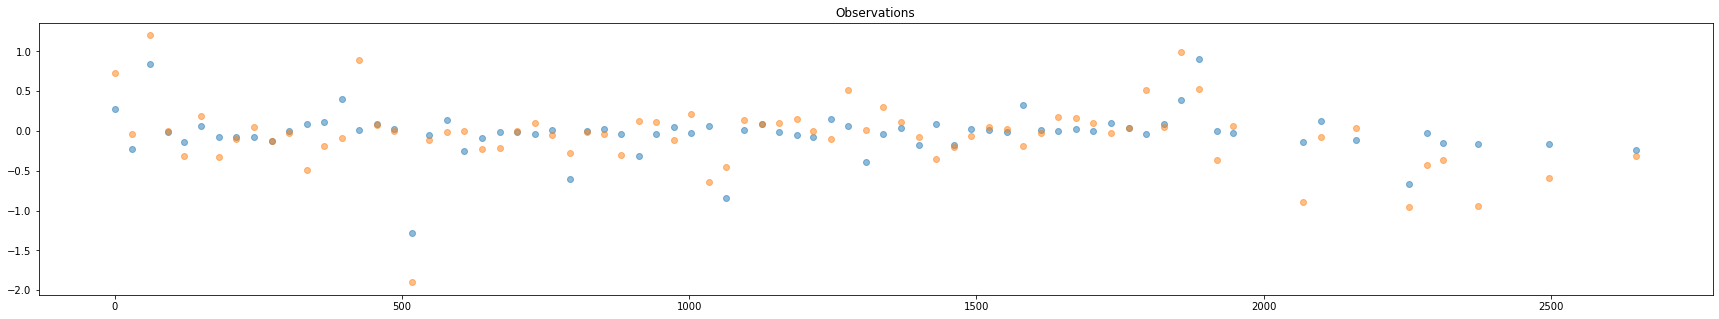

In [24]:
fig, ax = plt.subplots(3,1, figsize = (30,15))


pearson = []
kendall = []
spearman = []


for i in range(1,states.shape[1]):
    pearson.append(np.corrcoef(states[:,i,0], states[:,i,1])[0,1])
    spearman.append(scipy.stats.spearmanr(states[:,i,0], states[:,i,1])[0])
    kendall.append(scipy.stats.kendalltau(states[:,i,0], states[:,i,1])[0])

ax[0].plot(pearson)
ax[0].set_title("Pearson")
ax[1].plot(kendall)
ax[1].set_title("Kendall")
ax[2].plot(spearman)
ax[2].set_title("Spearman")


# esg_pivot_shifted_refined_diff = pd.read_pickle('../Yahoo/refined.pkl')

# Extract pair
# esg_pivot_shifted_refined_diff = pd.read_pickle('../Yahoo/refined.pkl')
# y_obs = np.array(esg_pivot_shifted_refined_diff[['GWW', 'ALLE']])
esg_pivot_shifted_refined_diff_pkl = pd.read_pickle('../Yahoo/sector_index.pkl')
y_obs = np.array(esg_pivot_shifted_refined_diff_pkl['data'][['Industrials', 'Healthcare']])
y_obs[~esg_pivot_shifted_refined_diff_pkl['index']['Industrials'],0] = np.nan
y_obs[~esg_pivot_shifted_refined_diff_pkl['index']['Healthcare'],1] = np.nan

fig, ax = plt.subplots(1,1, figsize = (30,5))
ax.scatter(range(y_obs.shape[0]), y_obs[:,0], alpha = 0.5)
ax.scatter(range(y_obs.shape[0]), y_obs[:,1], alpha = 0.5)
ax.set_title(f'Observations')